In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rnd
import numpy as np
import matplotlib
import seaborn as sns
import sys

# 71. ストップワード

In [6]:
stop_word_dict = {}
with open("./data/stop_word.txt", "r") as fi:
    for line in fi:
        stop_word_dict[line.strip()] = True

def is_stop_word(term, stop_word_dict):
    return stop_word_dict.get(term.lower(), False)

In [8]:
#testの記述
def assert_stop_word_dict(term, stop_word_dict):
    try:
        assert is_stop_word("a", stop_word_dict) == True
    except AssertionError:
        sys.stderr.write("{} is not a stop_word, but it should be.\n".format(term))
        raise AssertionError

In [9]:
# testの実行
assert_stop_word_dict("a", stop_word_dict)

# 72,73,74

In [214]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rnd
import numpy as np
import matplotlib
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [215]:
# データのロード
texts = []
labels = []
with open("./data/training.txt", "r") as fi:
    heads = [fi.next() for x in xrange(10000)]
for line in heads:
    label, text = line.rstrip().split(" ", 1)
    labels.append(label)
    texts.append(text)
        
labels = np.array(labels,dtype=np.float32)

In [216]:
#tokenizer, stemmerの用意
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import string

stemmer = PorterStemmer()
def stem_token(token): #single_token
    return stemmer.stem(token)

def tokenizer(text): #str
    tokens = word_tokenize(text)
    tokens = [stem_token(x) for x in tokens if x not in string.punctuation]
    return tokens

In [225]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.33, random_state=42)
stopword_list = list(stop_word_dict.keys())

In [218]:
text_clf = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenizer, stop_words=stopword_list,ngram_range=(1,2))),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['all', ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [219]:
text_clf.score(X_train, y_train)

0.96805970149253728

# 75. 素性の重み

In [220]:
from itertools import islice
feature_coefs = text_clf.steps[2][1].coef_
feature_list = text_clf.steps[0][1].get_feature_names()
weight_dict = {f:w for f,w in zip(feature_list, feature_coefs.tolist()[0])}

print "重みの低い素性トップ10"
for k,v in islice(sorted(weight_dict.items(), key=lambda x: x[1]), 10):
    print "{}\t{}".format(k,v)
print
print "重みの高い素性トップ10"
for k,v in islice(sorted(weight_dict.items(), key=lambda x: x[1], reverse=True), 10):
    print "{}\t{}".format(k,v)

重みの低い素性トップ10
bad	-2.9296239684
bore	-2.28427560627
dull	-2.21578140562
n't	-2.19611221026
thing	-1.93527113133
lack	-1.87768214267
much	-1.78606965688
onli	-1.77069998251
joke	-1.68282716265
fail	-1.6626980952

重みの高い素性トップ10
perform	2.30989297557
beauti	2.28536884764
enjoy	2.23408337938
film	2.16864943595
funni	2.10105036501
best	2.06569216724
move	1.88222831991
delight	1.82306875588
work	1.80141673011
heart	1.77794433629


# 76. ラベル付け

In [295]:
for label, predict, score in islice(zip(y_train, text_clf.predict(X_train), text_clf.predict_proba(X_train)), 100):
    print "{}\t{}\t{}".format(int(label), int(predict), score)

-1	-1	[ 0.69828041  0.30171959]
-1	-1	[ 0.65826513  0.34173487]
-1	-1	[ 0.67431306  0.32568694]
-1	-1	[ 0.64042727  0.35957273]
-1	-1	[ 0.59064288  0.40935712]
-1	-1	[ 0.68288457  0.31711543]
1	1	[ 0.46160085  0.53839915]
-1	-1	[ 0.68241353  0.31758647]
-1	-1	[ 0.67234294  0.32765706]
1	1	[ 0.34053484  0.65946516]
-1	-1	[ 0.74060643  0.25939357]
1	1	[ 0.27439916  0.72560084]
-1	-1	[ 0.50290536  0.49709464]
1	1	[ 0.36706488  0.63293512]
1	1	[ 0.30298068  0.69701932]
1	1	[ 0.40745948  0.59254052]
1	1	[ 0.39539336  0.60460664]
1	1	[ 0.43532335  0.56467665]
-1	-1	[ 0.52733055  0.47266945]
-1	-1	[ 0.65920679  0.34079321]
-1	-1	[ 0.61634864  0.38365136]
1	1	[ 0.33126279  0.66873721]
-1	-1	[ 0.6657432  0.3342568]
1	-1	[ 0.51611688  0.48388312]
1	1	[ 0.2411251  0.7588749]
-1	-1	[ 0.68037088  0.31962912]
-1	-1	[ 0.66862681  0.33137319]
1	1	[ 0.35607188  0.64392812]
-1	-1	[ 0.68493055  0.31506945]
-1	-1	[ 0.6371668  0.3628332]
-1	-1	[ 0.63120851  0.36879149]
-1	-1	[ 0.57969157  0.42030843]
-1	-1

# 77. 正解率の計測

In [197]:
from sklearn.metrics import precision_recall_fscore_support

In [199]:
y_true = y_train
y_pred = text_clf.predict(X_train)
precision_recall_fscore_support(y_true=y_true, y_pred=y_pred, average="binary")

(0.97539218701937869, 0.95945537065052955, 0.96735814521049424, None)

# 78. 5分割交差検定

In [230]:
# データのロード(再)
texts = []
labels = []
with open("./data/training.txt", "r") as fi:
    heads = [fi.next() for x in xrange(10000)]
for line in heads:
    label, text = line.rstrip().split(" ", 1)
    labels.append(label)
    texts.append(text)
        
labels = np.array(labels,dtype=np.float32)

texts = np.array(texts)

In [242]:
from sklearn.cross_validation import KFold
kf = KFold(len(texts), n_folds=5)

precision = []
recall = []
f1 = []
for train_index, test_index in kf:
    X_train, X_test = texts[train_index],texts[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    text_clf.fit(X_train, y_train)
    y_true = y_test
    y_pred = text_clf.predict(X_test)
    result = precision_recall_fscore_support(y_true=y_true, y_pred=y_pred, average="binary")
    print "precision: {0}\trecall: {1}\tf1: {2}".format(*result)
    precision.append(result[0])
    recall.append(result[1])
    f1.append(result[1])

print "Average Score:"
print "Precision: {}\tRecall: {}\tF1: {}".format(
    np.mean(precision),
    np.mean(recall),
    np.mean(f1))

precision: 0.741414141414	recall: 0.765380604797	f1: 0.753206772704
precision: 0.736178467507	recall: 0.765893037336	f1: 0.750741839763
precision: 0.775913129319	recall: 0.776679841897	f1: 0.776296296296
precision: 0.766233766234	recall: 0.743937924345	f1: 0.754921259843
precision: 0.752786220871	recall: 0.755081300813	f1: 0.753932014206
Average Score:
Precision: 0.754505145069	Recall: 0.761394541838	F1: 0.761394541838


# 79. 適合率-再現率グラフの描画

In [281]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.33, random_state=42)
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['all', ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [251]:
y_prob = text_clf.predict_proba(X_test)

In [282]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, y_prob[:,1:2])

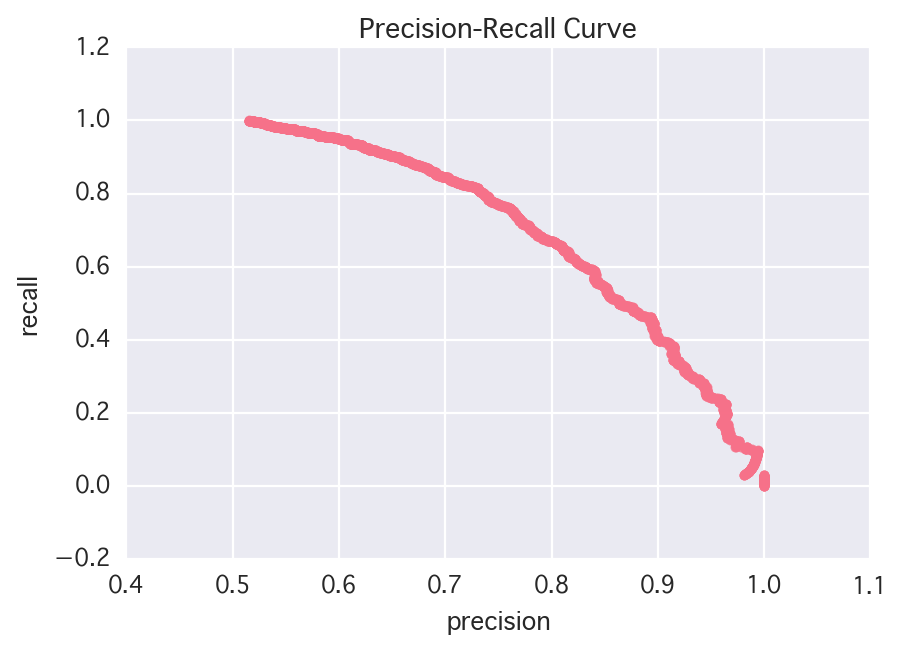

In [294]:
df = pd.DataFrame(data={"precision": precision, "recall": recall}) #dataframeにまとめるのが手っ取り早い
sns.set_palette("husl")
sns.regplot(x="precision", y="recall", data=df, fit_reg=False)
sns.plt.title('Precision-Recall Curve')
plt.show()
